Importing necessary libraries:

In [14]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating the Data:

In [17]:
plt.figure(figsize=(8,5))

seq_length = 20

# generating evenly spaced data points
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))

x = data[:-1]
y = data[1:]

Displaying the Data:

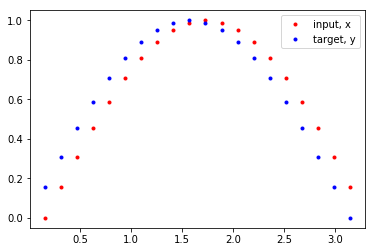

In [18]:
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

Here, Y is basically X shifted to one time step in the future. This is going to be out training data.

### Defining the RNN:

In [22]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)
        
        output = self.fc(r_out)
        return output, hidden

### Check the input and output dimensions: 

In [26]:
test_rnn = RNN(input_size = 1, output_size = 1, hidden_dim = 10, n_layers = 2)
time_Steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0)
print('Input size: ', test_input.size())

test_out, test_h = test_rnn(test_input, None)
print('output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 20, 1])
output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


## Training the RNN:

In [27]:
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [29]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.01)